## Import Library yang Diperlukan

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

from scipy.stats import chi2_contingency

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report



## Data Loading

In [2]:
# Upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dwilarassetyadita","key":"fe6de741a875da33d1ae5d355ed183bd"}'}

membuat direktori kaggle untuk menyimpan dataset

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Download dataset dari Kaggle

In [4]:
!kaggle datasets download -d mahdimashayekhi/mental-health -p /kaggle

Dataset URL: https://www.kaggle.com/datasets/mahdimashayekhi/mental-health
License(s): CC-BY-NC-SA-4.0
  0% 0.00/135k [00:00<?, ?B/s]
100% 135k/135k [00:00<00:00, 458MB/s]


unzip file

In [5]:
!unzip /kaggle/mental-health.zip -d /kaggle

Archive:  /kaggle/mental-health.zip
  inflating: /kaggle/mental_health_dataset.csv  


membuat dataframe dari dta csv

In [177]:
student_df = pd.read_csv('/kaggle/mental_health_dataset.csv')
student_df

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,34,Female,Employed,On-site,Yes,Yes,5,6.1,3,9,21,8,90.0,Medium
9996,47,Male,Employed,On-site,Yes,No,1,5.7,3,5,12,45,90.8,Medium
9997,56,Female,Employed,On-site,Yes,No,1,8.3,0,1,18,7,99.2,Medium
9998,24,Male,Employed,On-site,Yes,Yes,9,6.1,0,28,21,32,56.7,High


insight
- terdapat 10.000 baris data dalam dataset
- terdapat 14 kolom data yaitu : age, gender, employment_status,	work_environment,	mental_health_history,	seeks_treatment,	stress_level,	sleep_hours,	physical_activity_days,	depression_score,	anxiety_score	social_support_score,	productivity_score,	mental_health_risk.

## Exploratory Data Analysis

### Deskripsi Variabel

deskripsi variabel

In [178]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     10000 non-null  int64  
 1   gender                  10000 non-null  object 
 2   employment_status       10000 non-null  object 
 3   work_environment        10000 non-null  object 
 4   mental_health_history   10000 non-null  object 
 5   seeks_treatment         10000 non-null  object 
 6   stress_level            10000 non-null  int64  
 7   sleep_hours             10000 non-null  float64
 8   physical_activity_days  10000 non-null  int64  
 9   depression_score        10000 non-null  int64  
 10  anxiety_score           10000 non-null  int64  
 11  social_support_score    10000 non-null  int64  
 12  productivity_score      10000 non-null  float64
 13  mental_health_risk      10000 non-null  object 
dtypes: float64(2), int64(6), object(6)
memo

Insight
- terdapat 6 kolom kategorikal dengan tipe data object yaitu kolom gender, emplotment_status, work_environtment, mental_health_history, seeks_treatment, dan mental_health_risk.
- terdapat 6 kolom numerik dengan tipe data int64 yaitu : age, stress_level, physical_activity_days, depression_score, anxiety_score, dan social_support_score.
- terdapat 2 kolom numerik dengan tipe data float, yaitu: sleep_hours productivity_score

melihat presebaran data

In [179]:
student_df.describe()

,age,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.557600,5.572000,6.473000,3.505700,15.039900,10.56180,50.117700,77.312210
std,13.749581,2.887741,1.473944,2.282737,8.990839,6.32264,29.229278,14.061202
min,18.000000,1.000000,3.000000,0.000000,0.000000,0.00000,0.000000,42.800000
25%,30.000000,3.000000,5.500000,2.000000,7.000000,5.00000,25.000000,65.800000
50%,41.500000,6.000000,6.500000,4.000000,15.000000,11.00000,50.000000,77.600000
75%,53.000000,8.000000,7.500000,5.000000,23.000000,16.00000,76.000000,89.200000
max,65.000000,10.000000,10.000000,7.000000,30.000000,21.00000,100.000000,100.000000


### Meneriksa dan menangani missing value

memeriksa missing value

In [180]:
missing_values = student_df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


insight
- tidak ditemukan missing value di dalam dataset


### Memeriksa dan menangani Outliers

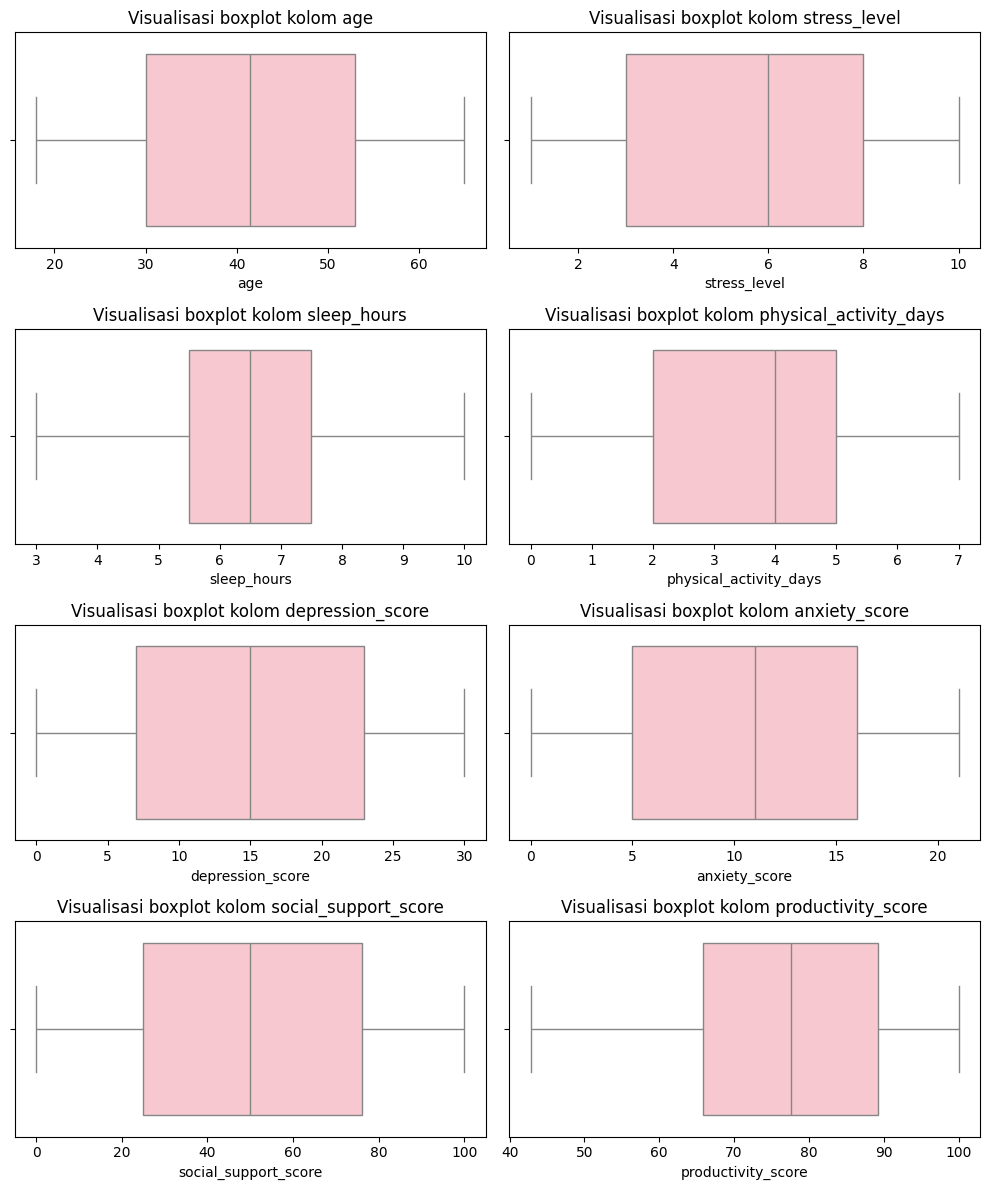

In [181]:
# mengambil semua kolom yang bertipe numerik
cols = student_df.select_dtypes(include='number').columns

# membuat matriks visualisasi 8x2
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axes = axes.flatten()

# membuat visualisasi boxplot untuk setiap kolom
for i, col in enumerate(cols):
  sns.boxplot(x=student_df[col], ax=axes[i], color='pink')
  axes[i].set_title(f'Visualisasi boxplot kolom {col}')
  axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

insight
- tidak ditemukan data dengan outliers

memeriksa data duplikat

In [182]:
jumlah_duplikat = student_df.duplicated().sum()
print(f"Jumlah data duplikat: {jumlah_duplikat}")

Jumlah data duplikat: 0


tidak ditemukan data duplikat

### Univariate Analysis

In [183]:
# memisahkan kolom tipe numerik dan kategori
numerical_features = student_df.select_dtypes(include='number').columns
categorical_features = student_df.select_dtypes(include='object').columns

# print kolom numerik
print('kolom numerik : ')
for col in numerical_features:
  print(f"-{col}")

# print kolom kategori
print('\nkolom kategori : ')
for col in categorical_features:
  print(f"-{col}")

kolom numerik : 
-age
-stress_level
-sleep_hours
-physical_activity_days
-depression_score
-anxiety_score
-social_support_score
-productivity_score

kolom kategori : 
-gender
-employment_status
-work_environment
-mental_health_history
-seeks_treatment
-mental_health_risk


melakukan univariate analysis pada data categorical

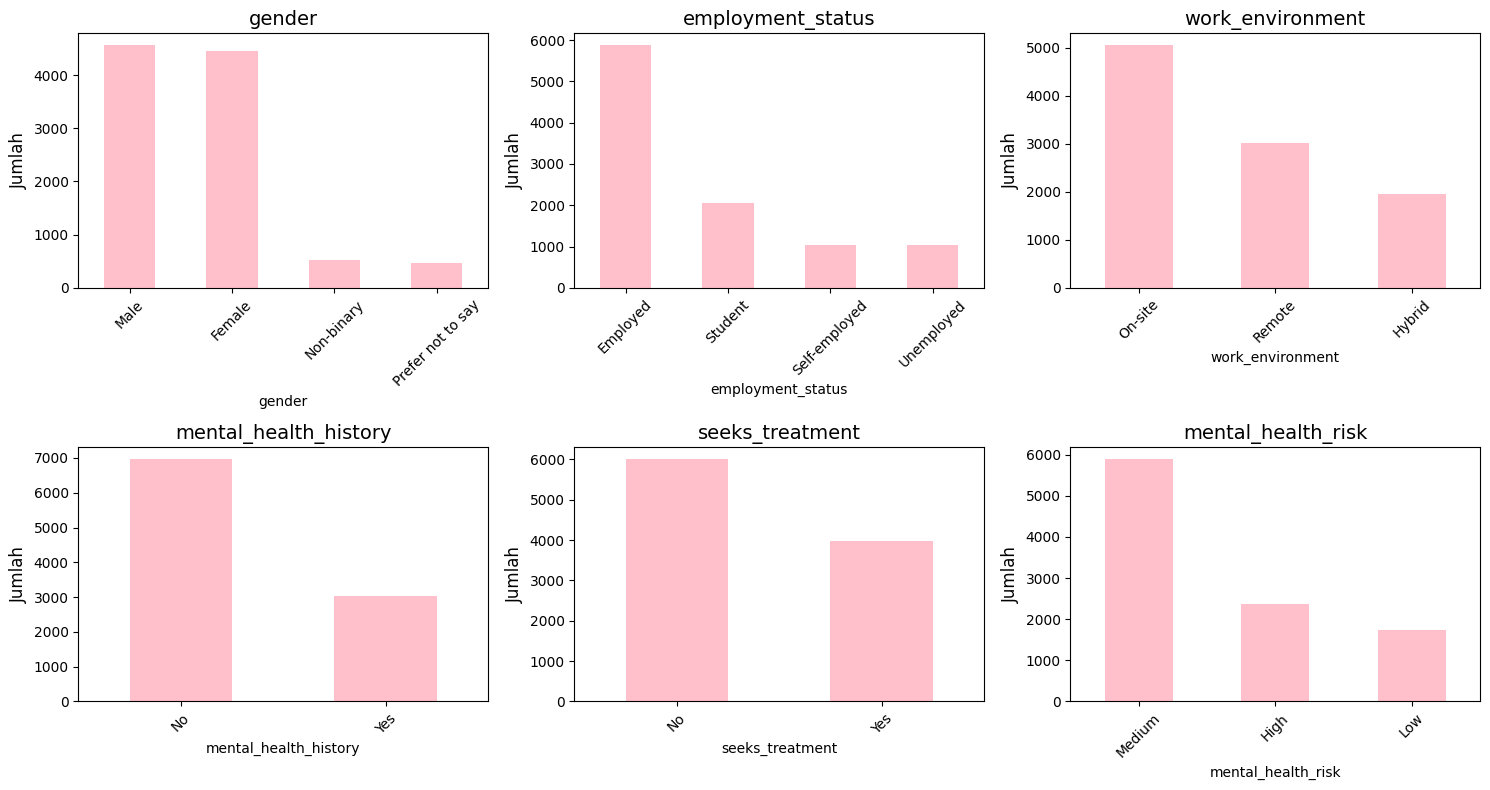

In [184]:
n_features = len(categorical_features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    count = student_df[col].value_counts()
    count.plot(kind='bar', color='pink', ax=axes[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_ylabel("Jumlah", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

insight
- Terdapat 4 kategori dalam fitur gender yang didominasi dengan kategori Male dan Female dengan perbandingan yang cukup seimbang.
- Terdapat 4 kategori dalam fitur employment, secara berurutan dari yang paling banyak adalah employed, kemudian diikuti student, self emoployed, dan yang paling sedikit adalah unemployed.
- terdapat 3 kategori dalam fitur work_environtment. secara berurutan dari yang paling banyak adalah onsite, Remote, dan Hybrid.
- terdapat 2 kategori dalam fitur mental_health_history. dengan hampir 70% data memiliki value no yang berarti sebagian besar tidak memiliki riwayat penyakit mental.
terdapat 2 kategori dalam fitur seeks_treatment, yaitu yes dan no. dengan hampir 60% data menyatakan no yang artinya belum pernah mencari bantuan professional dalam masalah kesehatan mental.
- terdapat 3 kategori dalam fitur mental_health_risk. Secara berurutan dari yang terbesar adalah medium sebesar 58,9%m high sebesar 23,7%, dan low sebesar 17,4%.


melakukan univariate data analysis pada fitur numerik

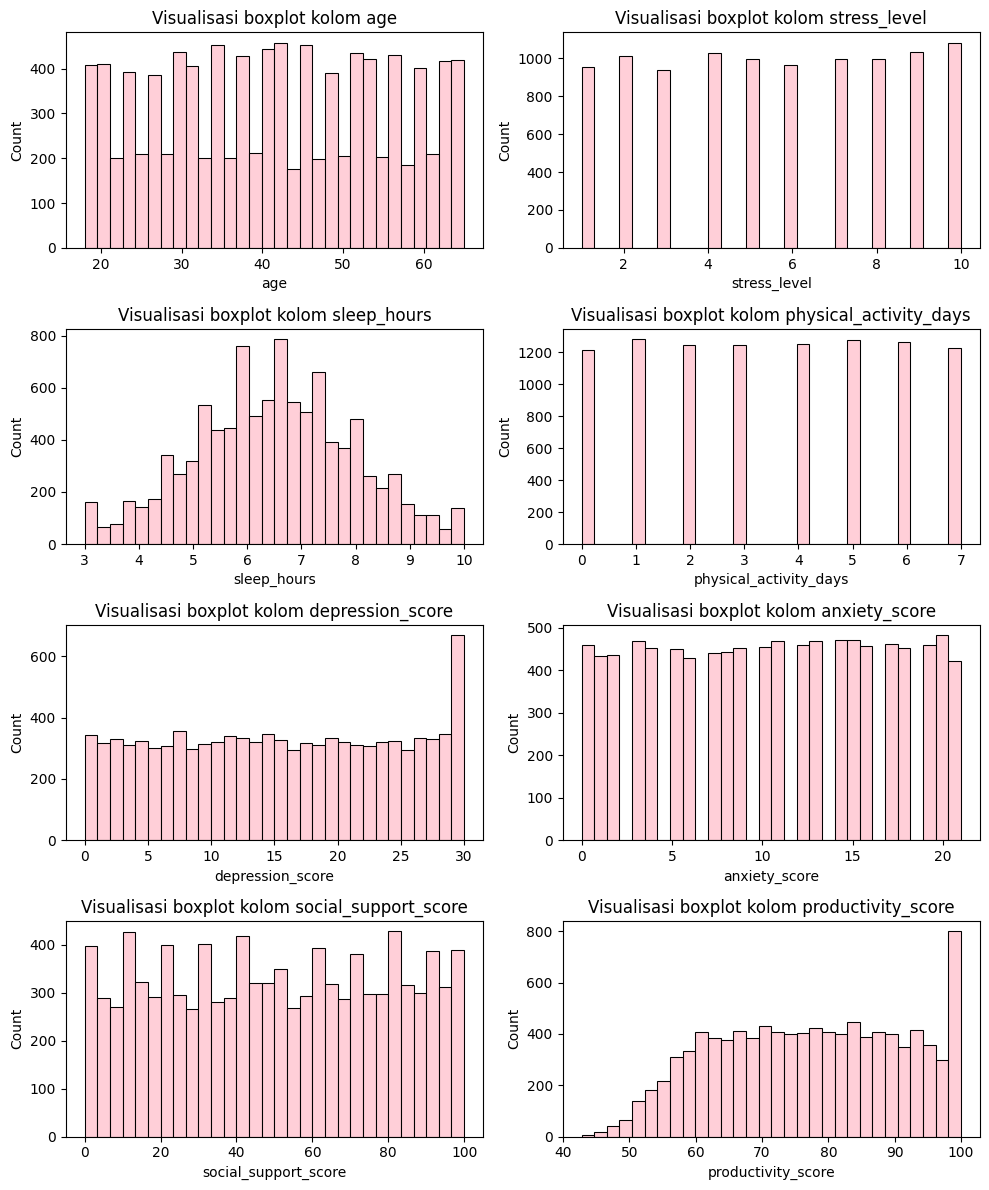

In [185]:
# membuat matriks visualisasi 8x2
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axes = axes.flatten()

# membuat visualisasi boxplot untuk setiap kolom
for i, col in enumerate(numerical_features):
  sns.histplot(x=student_df[col], ax=axes[i], color='pink', bins=30)
  axes[i].set_title(f'Visualisasi boxplot kolom {col}')
  axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

insight
- data pada kolom stress_level, age, physical_activity_days, anxiety_score, dan social_support_score cenderung memiliki presebaran yang merata
- terdapat peningkatan jumlah yang signifikan pada data fitur depression_rate dengan score 30.
- terdapat peningkatan jumlah yang signifikan pada data fitur productivity_score pada nilai maksimal (100)
- data sleep_hours cenderung terdistribusi normal


### Multivariate Analysis

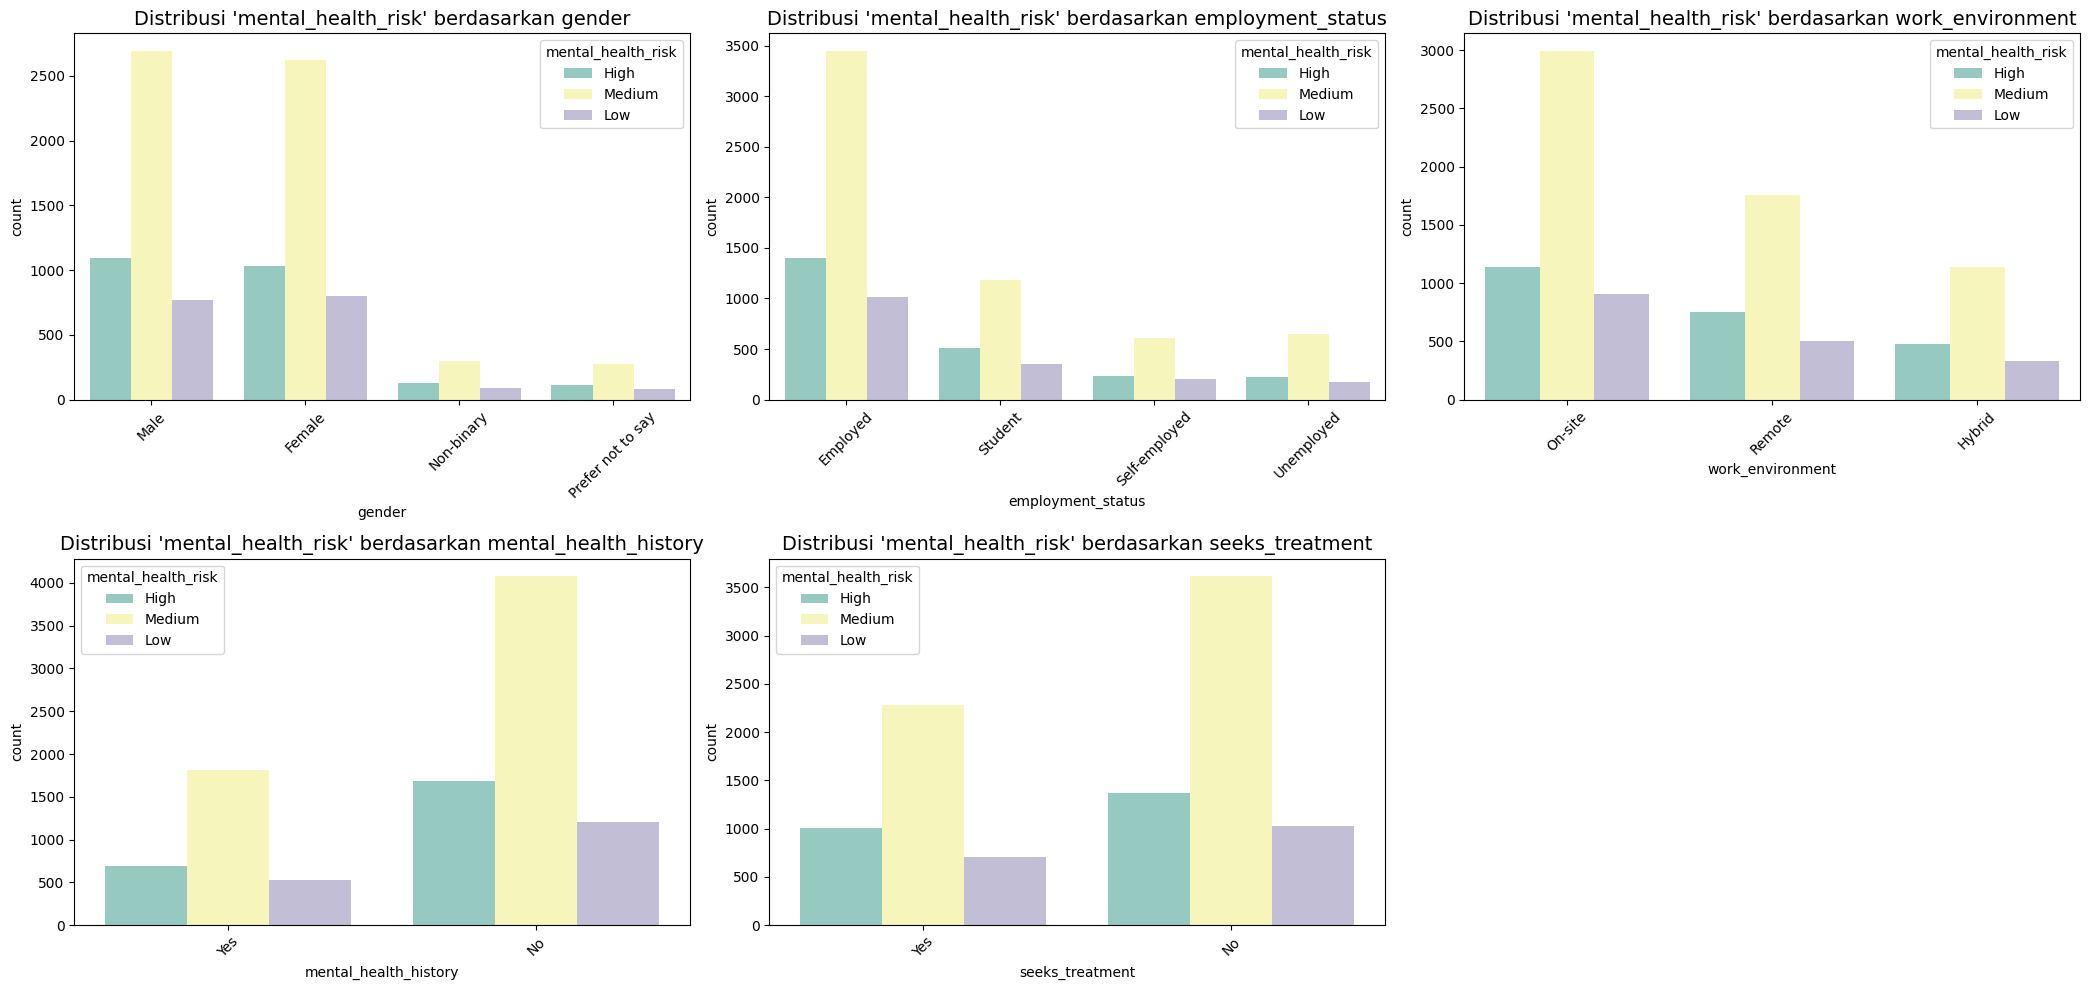

In [186]:
cat_features = ['gender', 'employment_status', 'work_environment', 'mental_health_history', 'seeks_treatment']

n_features = len(cat_features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(7 * n_cols, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(cat_features):
    sns.countplot(x=col, hue='mental_health_risk', data=student_df, palette='Set3', ax=axes[i])
    axes[i].set_title(f"Distribusi 'mental_health_risk' berdasarkan {col}", fontsize=14)
    axes[i].tick_params(axis='x', rotation=45)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

insight
- pada fitur gender, resiko kesehatan mental cenderung merata di semua gender dengan mayoritas berada pada resiko sedang, tidak ada kategori tertentu yang cenderung memiliki resiko kesehatan mental high, medium, maupun low.
- pada fitur employment status, resiko kesehatan mental pada setiap kategori cenderung merata, tidak ada kategori tertentu yang cenderung memiliki resiko kesehatan mental high, medium, maupun low.
- pada fitur employment_environtment, resiko kesehatan mental pada setiap kategori juga cenderung merata, tidak ada kategori tertentu yang cenderung memiliki resiko kesehatan mental high, medium, maupun low.
- pada fitur mental_health_history, resiko kesehatan mental pada setiap kategori cenderung merata, tidak ada kategori tertentu yang cenderung memiliki resiko kesehatan mental high, medium, maupun low.  
- pada fitur seeks_treatment, tidak ada kategori tertentu yang cenderung memiliki resiko kesehatan mental high, medium, maupun low.

uji chi-square untuk menguji hubungan antara variabel kategorikal dengan variabel target yang merupakan kategorikal

In [187]:
def chi_square_test(data, feature, target):
    table = pd.crosstab(data[feature], data[target])
    chi2, p, dof, expected = chi2_contingency(table)
    return p


for col in cat_features:
    p_value = chi_square_test(student_df, col, 'mental_health_risk')
    print(f"{col}: p-value = {p_value:.4f}")

gender: p-value = 0.7755
employment_status: p-value = 0.1609
work_environment: p-value = 0.1351
mental_health_history: p-value = 0.3447
seeks_treatment: p-value = 0.0059


insight
- fitur seeks_treatment menunjukkan hubungan yang signifikan secara statistik terhadap fitur mental_health_risk. Hal ini dapat diartikan bahwa kecenderungan individu untuk mencari bantuan atau perawatan memiliki pengaruh yang signifikan terhadap tingkat resiko kesehatan mental mereka.
- fitur lain seperti gender, employment_status, work_environtment, dan mental_health_history tidak menunjukkan hubungan statistik yang signifikan terhadap fitur mental_health_risk. Hal ini dapat diartikan bahwa faktor-faktor tersebut tidak cukup kuat untuk membedakan tingkat resiko kesehatan mental pada individu.

melakukan multivariate analysis untuk fitur numerik terhadap fitur target

<ipython-input-188-8eb401a9ea5d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mental_health_risk', y=col, data=student_df, palette='Set2', ax=axes[i])
<ipython-input-188-8eb401a9ea5d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mental_health_risk', y=col, data=student_df, palette='Set2', ax=axes[i])
<ipython-input-188-8eb401a9ea5d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mental_health_risk', y=col, data=student_df, palette='Set2', ax=axes[i])
<ipython-input-188-8eb401a9ea5d>:5: FutureWarning: 

Passing `palette` wi

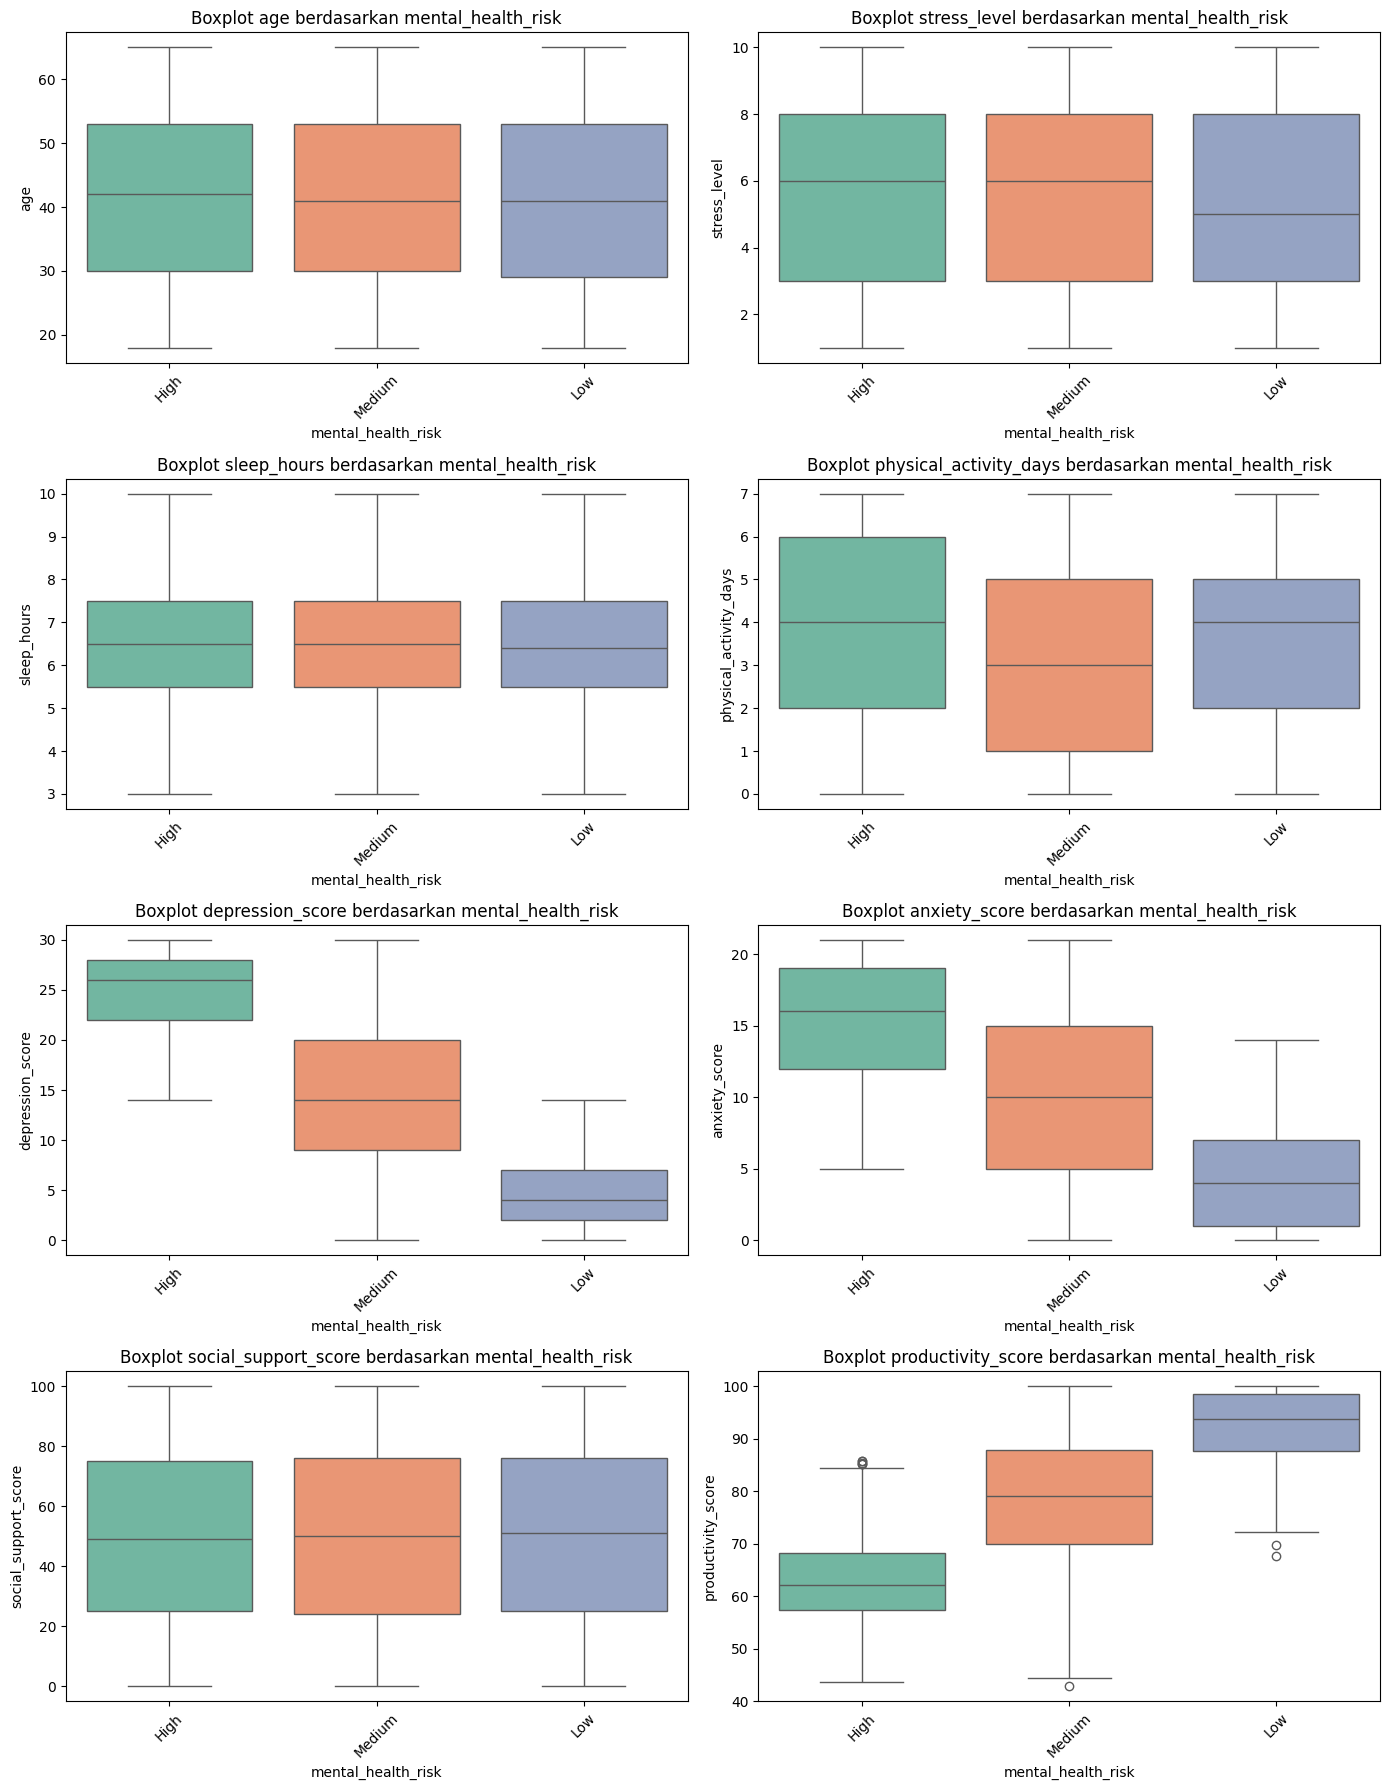

In [188]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 18))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(x='mental_health_risk', y=col, data=student_df, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Boxplot {col} berdasarkan mental_health_risk')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

insight
- pada fitur age, tidak terdapat kalangan umur tertentu yang memiliki kecenderungan resiko kesehatan mental kategori high, medium, maupun low.
- pada fitur stress_level, variasi stress pada setiap individu di dalam kategori mental_health_risk cenderung mirip, namun tingkat stress secara umum (berdasarkan median) pada fitur mental_health_risk kategori low cenderung memiliki tingkat stress yang lebih rendah.
- pada fitur sleep_hours, tidak terdapat waktu tidur tertentu yang memiliki kecenderungan kesehatan mental kategori high, medium, maupun low.
- pada fitur physical_activity_days, individu dengan resiko kesehatan mental kategori high menunjukkan kecenderungan memiliki tingkat akivitas fisik yang lebih tinggi dibandingkan kategori lainnya. Individu dengan resiko kesehatan mental high dan low memiliki median aktivitas fisik mingguan yang sama, yaitu sekitar 4 hari. Sementara itu, individu dengan resiko kategori Medium memiliki median aktivitas fisik yang lebih rendah yaitu sekitar 3 hari.
- pada fitur depression_score, menunjukkan bahwa semakin tinggi resiko kesehatan mental seseorang, semakin tinggi pula skor depresi yang dimilikinya. ini menunjukkan bahwa kolom depression_score menunjukkan korelasi yang tinggi dengan kolom mental_health_risk.
- pada fitur anxiety_score, menunjukkan bahwa semakin tinggi resiko kesehatan mental seseorang, semakin tinggi pula anxiety_score yang dimilikinya. ini menunjukkan bahwa kolom anxiety_score memiliki korelasi yang cukup tinggi dengan kolom mental_health_risk.
- Distribusi nilai pada fitur social_support terlihat relatif merata di setiap kategori mental_health_risk, tanpa adanya perbedaan yang mencolok di antara kategori tersebut.
- pada fitur productivity_score menunjukkan korelasi yang kuat dengan fitur mental_health_risk. Dimana resiko kesehatan mental individu dengan kategori low memiliki tingkat produktifitas tertinggi dengan nilai median sekitar 95, kemudian individu dengan resiko kesehatan mental kategori medium memiliki nilai median tingkat produktifitas yang lebih rendah yaitu sekitar 80, dan yang terakihr adalah individu dengan tingkat resiko kesehatan mental kategori hight memiliki tingkat produktivitas terendan dengan median sekitar 60-an.


### Menghapus kolom yang tidak diperlukan

Berdasarkan Exploratory Data Analysis yang dilakukan sebelumnya didapatkan informasi mengenai beberapa kolom yang memiliki korelasi rendah terhadap fitur target 'mental_health_risk'. Beberapa kolom tersebut adalah 'gender', 'employment_status', 'work_environment', 'mental_health_history', 'age', 'stress_level', 'sleep_hours', dan 'social_support_score'.

Dalam membangun model machine learning analytics predictive, fitur-fitur ini akan dihapus.

In [189]:
student_df.drop(columns=['gender', 'employment_status', 'work_environment', 'mental_health_history', 'age', 'stress_level', 'sleep_hours', 'social_support_score'], inplace=True)

memeriksa apakah kolom berhasil dihapus

In [190]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   seeks_treatment         10000 non-null  object 
 1   physical_activity_days  10000 non-null  int64  
 2   depression_score        10000 non-null  int64  
 3   anxiety_score           10000 non-null  int64  
 4   productivity_score      10000 non-null  float64
 5   mental_health_risk      10000 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 468.9+ KB


## Data Preparation

### Encoding kolom kategorikal

In [191]:
le = LabelEncoder()

# encoder kolom seeks_treatment dengan label encoder karena hanya berisi 2 kategori
student_df['seeks_treatment'] = le.fit_transform(student_df['seeks_treatment'])
student_df.head()

# encoder kolom mental_health_risk dengan label encoder karena termasuk data ordinal
student_df['mental_health_risk'] = le.fit_transform(student_df['mental_health_risk'])

memeriksa apakah encoding berhasil

In [192]:
student_df.head()

,seeks_treatment,physical_activity_days,depression_score,anxiety_score,productivity_score,mental_health_risk
0,1,3,28,17,59.7,0
1,1,4,30,11,54.9,0
2,0,2,24,7,61.3,2
3,0,4,6,0,97.0,1
4,1,0,24,12,69.0,0


### PCA

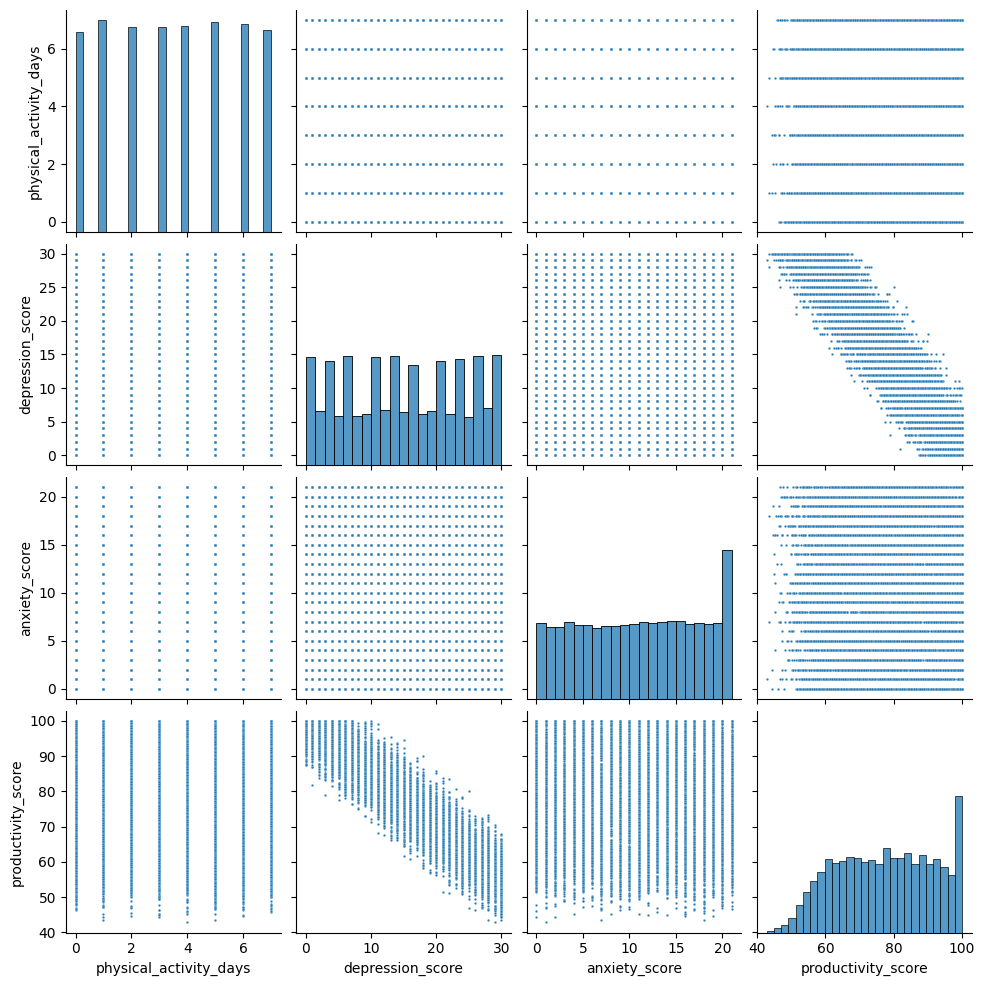

In [193]:
sns.pairplot(student_df[['physical_activity_days', 'depression_score', 'anxiety_score', 'productivity_score']], plot_kws={"s": 3});

insight
- berdasarkan visualisasi data tersebut tidak perlu dilakukan PCA

### Spliting Data

In [194]:
X = student_df.drop(['mental_health_risk'], axis=1)
y = student_df['mental_health_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 10000
Total # of sample in train dataset: 9000
Total # of sample in test dataset: 1000


### Standarization

In [195]:
numeric_features = ['physical_activity_days', 'depression_score', 'anxiety_score', 'productivity_score']
scaler = StandardScaler()
scaler.fit(X_train[numeric_features])
X_train[numeric_features] = scaler.transform(X_train.loc[:, numeric_features])
X_train[numeric_features].head()

,physical_activity_days,depression_score,anxiety_score,productivity_score
5215,-0.219618,-1.115686,-0.562012,1.332543
7946,0.218547,-1.560823,-0.562012,1.375170
7882,-0.219618,-1.226970,0.069817,1.154929
7343,-1.095946,-0.336697,-0.246098,1.048361
1317,-0.657782,-1.115686,0.385732,1.481738


memeriksa data fitur train

In [196]:
X_train[numeric_features].describe().round(4)

,physical_activity_days,depression_score,anxiety_score,productivity_score
count,9000.0000,9000.0000,9000.0000,9000.0000
mean,-0.0000,-0.0000,0.0000,0.0000
std,1.0001,1.0001,1.0001,1.0001
min,-1.5341,-1.6721,-1.6677,-2.4542
25%,-1.0959,-0.8931,-0.8779,-0.8201
50%,0.2185,-0.0028,0.0698,0.0182
75%,0.6567,0.8874,0.8596,0.8423
max,1.5330,1.6664,1.6494,1.6096


## Modeling

membuat dataframe untuk menyimpan akurasi

In [197]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
model_names = ['KNN', 'RandomForest', 'Boosting']
models_df = pd.DataFrame(index=metrics, columns=model_names)

### KNN

membangun model knn

In [198]:
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

models_df.loc['Accuracy', 'KNN'] = accuracy_score(y_test, y_pred_knn)
models_df.loc['Precision', 'KNN'] = precision_score(y_test, y_pred_knn, average='weighted')
models_df.loc['Recall', 'KNN'] = recall_score(y_test, y_pred_knn, average='weighted')
models_df.loc['F1-score', 'KNN'] = f1_score(y_test, y_pred_knn, average='weighted')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Random Forest

membangun model random forest

In [199]:
model_RF = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
model_RF.fit(X_train, y_train)
y_pred_rf = model_RF.predict(X_test)

models_df.loc['Accuracy', 'RandomForest'] = accuracy_score(y_test, y_pred_rf)
models_df.loc['Precision', 'RandomForest'] = precision_score(y_test, y_pred_rf, average='weighted')
models_df.loc['Recall', 'RandomForest'] = recall_score(y_test, y_pred_rf, average='weighted')
models_df.loc['F1-score', 'RandomForest'] = f1_score(y_test, y_pred_rf, average='weighted')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Bosting Algorithm

membangun model Boosting Algorithm

In [200]:
model_boosting = AdaBoostClassifier(learning_rate=0.05, random_state=55)
model_boosting.fit(X_train, y_train)
y_pred_boost = model_boosting.predict(X_test)

models_df.loc['Accuracy', 'Boosting'] = accuracy_score(y_test, y_pred_boost)
models_df.loc['Precision', 'Boosting'] = precision_score(y_test, y_pred_boost, average='weighted')
models_df.loc['Recall', 'Boosting'] = recall_score(y_test, y_pred_boost, average='weighted')
models_df.loc['F1-score', 'Boosting'] = f1_score(y_test, y_pred_boost, average='weighted')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Evaluasi

evaluasi

In [201]:
print(models_df)

                KNN RandomForest  Boosting
Accuracy      0.602        0.238     0.593
Precision  0.529843     0.182446  0.351649
Recall        0.602        0.238     0.593
F1-score   0.461121     0.100868  0.441493


visualisasi akurasi

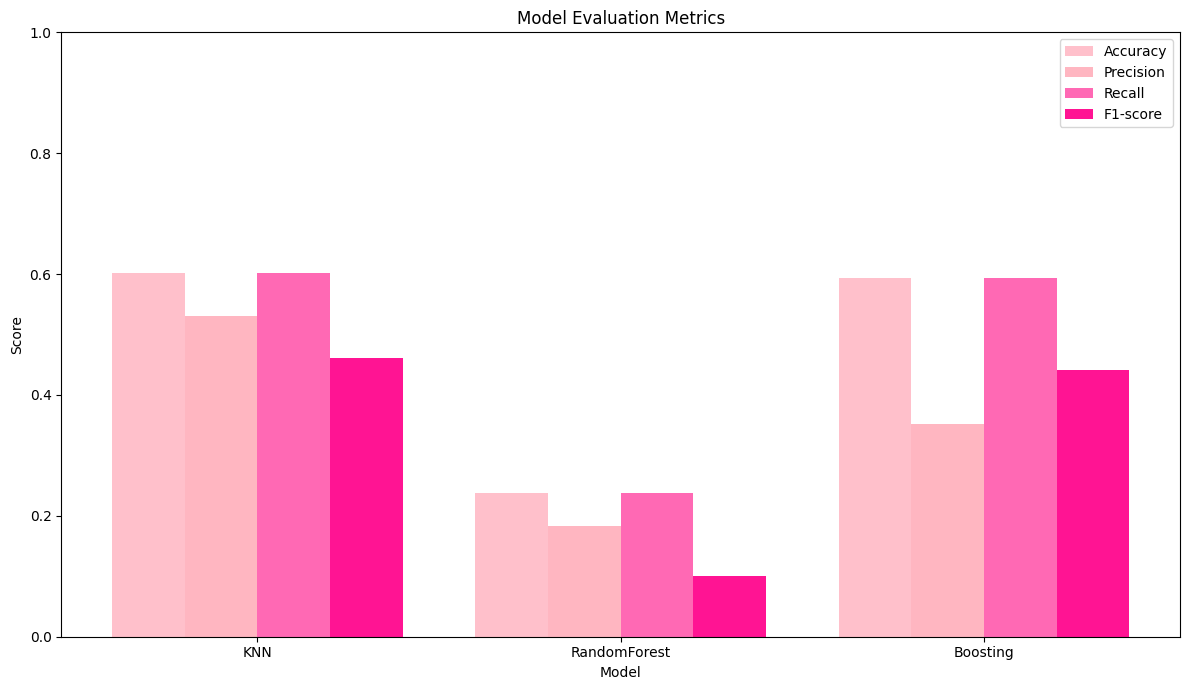

In [202]:
colors = ['pink', 'lightpink', 'hotpink', 'deeppink']

x = np.arange(len(model_names))  # posisi label x
width = 0.2  # lebar bar

plt.figure(figsize=(12, 7))

# Buat bar chart dengan warna yang berbeda untuk setiap metrik
for i, (metric, color) in enumerate(zip(metrics, colors)):
    plt.bar(x + (i - 1.5) * width, models_df.loc[metric], width, label=metric, color=color)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.xticks(x, model_names)
plt.ylim(0, 1.0)
plt.legend()
plt.tight_layout()
plt.show()

mencoba prediksi

In [203]:
model_dict = {
    'KNN': model_knn,
    'RandomForest': model_RF,
    'Boosting': model_boosting
}

prediksi = X_test.iloc[:1].copy()

pred_dict = {
    'y_true': y_test.iloc[:1].values[0]
}

for name, model in model_dict.items():
    pred_dict['prediksi_' + name] = model.predict(prediksi)[0]

hasil_prediksi = pd.DataFrame([pred_dict])
print(hasil_prediksi)

   y_true  prediksi_KNN  prediksi_RandomForest  prediksi_Boosting
0       2             2                      0                  2


Model terbaik adalah model KNN yang menghasilkan tingkat akurasi tertinggi jika dibandingkan dengan model Boosting dan Random Forest.